In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib notebook
mpl.style.use(r'\\fil-ask-004\python\mplstyle\4subsea.mplstyle')

In [2]:
import timeseriesclient as tsc

In [3]:
tsc.globalsettings.environment.set_test()  # Work with test environment

# Create series data
The `timeseriesclient` work with Pandas Dataframe and Series object. Let's create a dummy series. 

In [4]:
index = pd.date_range('2016-01-03 00:00:00', freq='min', periods=100)
df_dummy = pd.DataFrame({'temp': 20. + np.random.randn(100)}, index=index)

In [5]:
df_dummy.head()

,temp
2016-01-03 00:00:00,20.541108
2016-01-03 00:01:00,19.654093
2016-01-03 00:02:00,20.965756
2016-01-03 00:03:00,18.488304
2016-01-03 00:04:00,17.443641


# Upload to the reservoir

First, authenticate yourself towards the reservoir.

In [6]:
auth_key = tsc.Authenticator('reservoir-integrationtest@4subsea.com')

Password: ········


Then initiate a client and use the authentication key.

In [7]:
client = tsc.TimeSeriesClient(auth_key)

Upload the DataFrame and store the response from the reservoir.

In [8]:
response = client.create(df_dummy)

In [9]:
response

{u'FileId': u'299a9994-7e6e-4aeb-9420-efabeb9aaeaf',
 u'TimeOfFirstSample': 1451779200000000000L,
 u'TimeOfLastSample': 1451785140000000000L,
 u'TimeSeriesId': u'14783f40-ad25-4bba-b88c-0821a6380938'}

The reservoir assigns a unique id - TimeSeriesId. This id can be used to make requests towards the reservoir.

# Series information

Lets ask the reservoir about the newly created series data.

In [10]:
info = client.info(response['TimeSeriesId'])

In [11]:
info

{u'Created': u'2017-01-27T08:43:10.2682153+00:00',
 u'CreatedByEmail': u'reservoir-integrationtest@4subsea.com',
 u'LastModified': u'2017-01-27T08:43:10.2682153+00:00',
 u'LastModifiedByEmail': u'reservoir-integrationtest@4subsea.com',
 u'Metadata': [],
 u'TimeOfFirstSample': 1451779200000000000L,
 u'TimeOfLastSample': 1451785140000000000L,
 u'TimeSeriesId': u'14783f40-ad25-4bba-b88c-0821a6380938'}

Note that the `TimeOfFirstSample` and `TimeOfLastSample` is stored as nanoseconds since POSIX epoch.

# Append more data

You can always append more data to the same timeseries entry. The data may even overlap, which in that case the most recent entry overwrites.

In [12]:
index = pd.date_range('2016-01-03 00:00:50', freq='min', periods=100)
df_dummy_append = pd.DataFrame({'temp': 23. + np.random.randn(100)}, index=index)

In [13]:
client.append(df_dummy_append, response['TimeSeriesId'])

{u'FileId': u'66314a2a-4866-49b3-8dbe-11035192eefa',
 u'TimeOfFirstSample': 1451779250000000000L,
 u'TimeOfLastSample': 1451785190000000000L,
 u'TimeSeriesId': u'14783f40-ad25-4bba-b88c-0821a6380938'}

# Retrieve data back from the reservoir
You can download data from the reservoir. Data is presented as Pandas Series object. The index is by default kept as integers.

In [14]:
data = client.get(response['TimeSeriesId'])

In [15]:
data.head()

time
1451779200000000000    20.541108
1451779250000000000    23.338003
1451779310000000000    21.624493
1451779370000000000    22.588542
1451779430000000000    22.732879
Name: values, dtype: float64

But the index can be converted to date-time if desired.

In [16]:
data_datetime = client.get(response['TimeSeriesId'], convert_date=True)

In [17]:
data_datetime.head()

time
2016-01-03 00:00:00    20.541108
2016-01-03 00:00:50    23.338003
2016-01-03 00:01:50    21.624493
2016-01-03 00:02:50    22.588542
2016-01-03 00:03:50    22.732879
Name: values, dtype: float64

## Work with data

<IPython.core.display.Javascript object>


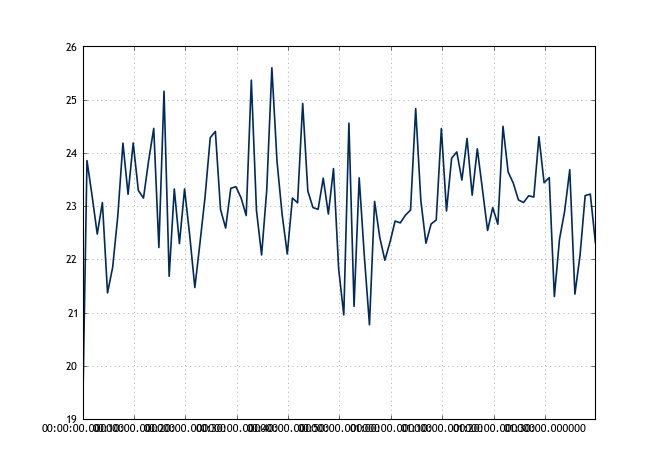

In [21]:
plt.figure()
plt.plot(data_datetime)

# Delete data in the reservoir

In [18]:
client.delete(response['TimeSeriesId'])